# 2022 Urtarilla

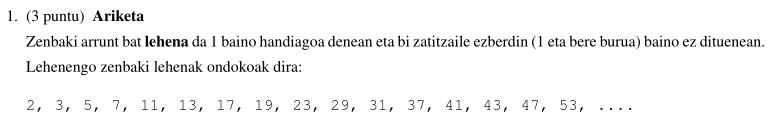

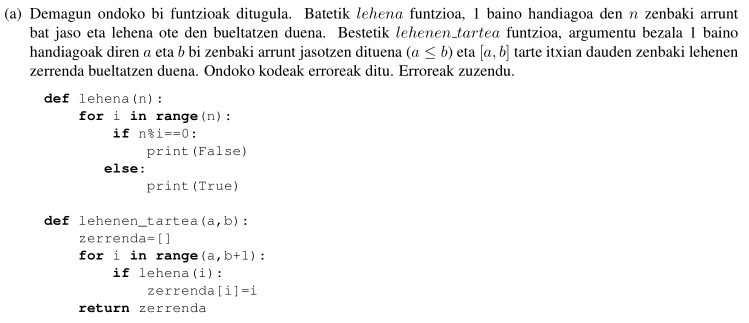

In [3]:
def lehena(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

def lehenen_tartea(a,b):
    zerrenda=[]
    for i in range(a,b+1):
        if lehena(i):
            zerrenda.append(i)
    return zerrenda

# Enuntziatuko zenbakiak lortzeko, adibidez:
print(*lehenen_tartea(2,55))

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53


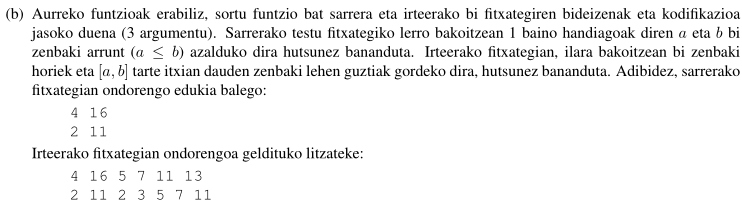

In [5]:
def f1b(fizena1,fizena2,kodif='utf8'):
    with open(fizena1,encoding=kodif) as sarrera :
        with open(fizena2,mode='w',encoding=kodif) as irteera :
            for line in sarrera:
                z = []
                for x in line.split():
                    z.append(int(x))
                a,b = z
                print(a,b,*lehenen_tartea(a,b),file=irteera)
                
# Enuntziatuko adibideko zenbakiak fitx1.txt fitxategian baleude
# eta emaitza fitx2.txt fitxategian (biak utf8) uzteko, adibidez:
f1b('fitx1.txt','fitx2.txt')

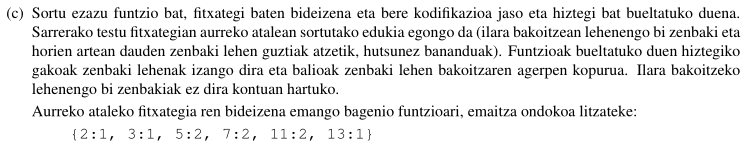

In [8]:
def f1c(fizena,kodif='utf8'):
    with open(fizena,encoding=kodif) as f :
        h = {}
        for line in f:
            for x in line.split()[2:]:
                prime = int(x)
                h[prime] = h.get(prime,0) + 1
        return h
    
# Aurreko ariketako fitx2.txt prozesatzeko, adibidez:
f1c('fitx2.txt')             

{5: 2, 7: 2, 11: 2, 13: 1, 2: 1, 3: 1}

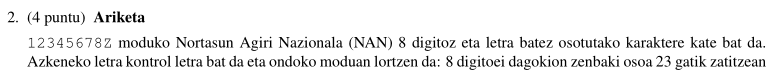
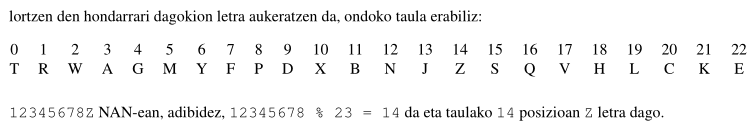

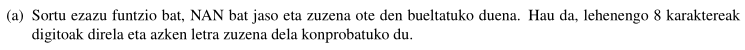

In [21]:
def f2a(nan):
    if len(nan) != 9:
        return False
    for k in nan[:8]:
        if not k.isdigit():
            return False
    table='TRWAGMYFPDXBNJZSQVHLCKE'
    if table[int(nan[:8]) % 23] != nan[8]:
        return False
    return True

# nan batzuekin adibideak:
f2a('12345678Z'),f2a('123456780'),f2a('12345678'),f2a('A2345678Z'),f2a('12345678H')


(True, False, False, False, False)

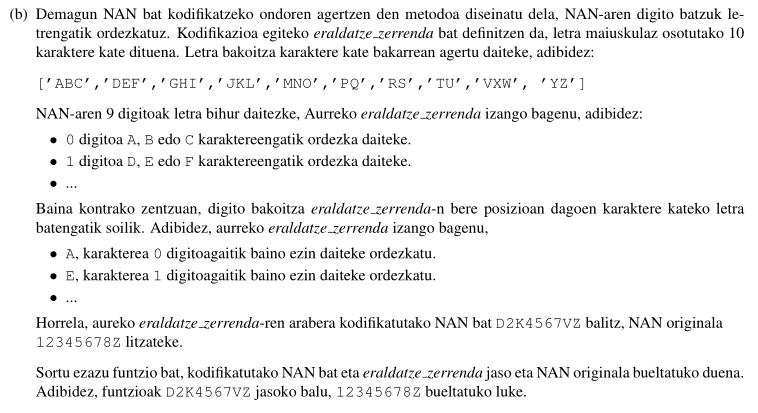

In [26]:
def f2b(nan_kodif,eraldatze_zerrenda):
    nan=''
    for k in nan_kodif[:8] :
        if not k.isdigit():
            for i,s in enumerate(eraldatze_zerrenda):
                if k in s :
                    k = str(i)
        nan += k
    nan += nan_kodif[8]
    return nan

# Enuntziatuko adibidea frogatzeko, adibidez:
f2b('D2K4567VZ',['ABC','DEF','GHI','JKL','MNO','PQ','RS','TU','VXW', 'YZ'])

'12345678Z'

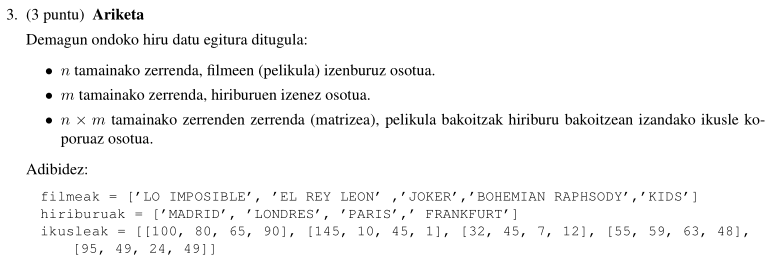

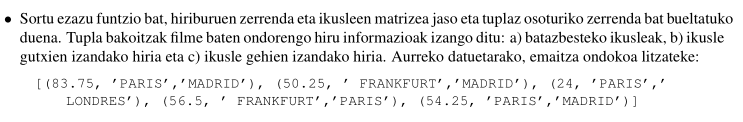

In [36]:
# Adibideetan erabiliko ditugun datuak:
filmeak = ['LO IMPOSIBLE', 'EL REY LEON' ,'JOKER','BOHEMIAN RAPHSODY','KIDS']
hiriburuak = ['MADRID', 'LONDRES', 'PARIS','FRANKFURT']
ikusleak = [
    [100, 80, 65, 90], 
    [145, 10, 45,  1], 
    [32,  45,  7, 12], 
    [55,  59, 63, 48],
    [95,  49, 24, 49]]

In [38]:
def f3a(hiriburuak,ikusleak):
    e = []
    for z in ikusleak :
        hmax,imax = hiriburuak[0],z[0]
        hmin,imin = hiriburuak[0],z[0]
        for h,i in zip(hiriburuak,z):
            if i > imax :
                hmax,imax = h,i
            elif i < imin :
                hmin,imin = h,i
        e.append((sum(z)/len(z),hmin,hmax))
    return e
    
    
# Enuntziatuko adibidea:
print(*f3a(hiriburuak,ikusleak),sep='\n')

(83.75, 'PARIS', 'MADRID')
(50.25, 'FRANKFURT', 'MADRID')
(24.0, 'PARIS', 'LONDRES')
(56.25, 'FRANKFURT', 'PARIS')
(54.25, 'PARIS', 'MADRID')


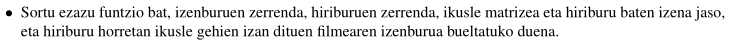

In [39]:
def f3b(filmeak,hiriburuak,ikusleak,hiria):
    for hpos,hi in enumerate(hiriburuak):
        if hi == hiria :
            break
    filma,ikmax = filmeak[0],ikusleak[0][hpos]
    for f,z in zip(filmeak,ikusleak):
        if z[hpos] > ikmax:
            filma,ikmax = f,z[hpos]
    return filma

# Adibidez, enuntziatuko datuekin hiri bakoitzeko filma famatuena:
for hi in hiriburuak :
    print(f'{hi} : {f3b(filmeak,hiriburuak,ikusleak,hi)}')

MADRID : EL REY LEON
LONDRES : LO IMPOSIBLE
PARIS : LO IMPOSIBLE
FRANKFURT : LO IMPOSIBLE


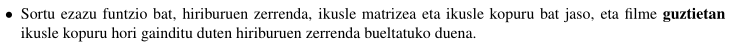

In [45]:
def f3c(hiriburuak,ikusleak,kop):
    e = []
    for i,hiria in enumerate(hiriburuak):
        for z in ikusleak:
            if z[i] < kop :
                break
        else :
            e.append(hiria)
    return e

# kopuru minimo ezberdinekin adibidez:
for k in [0,5,10,20,40]:
    print(k,'ikusle gainditutako hiriburuak:',*f3c(hiriburuak,ikusleak,k))

0 ikusle gainditutako hiriburuak: MADRID LONDRES PARIS FRANKFURT
5 ikusle gainditutako hiriburuak: MADRID LONDRES PARIS
10 ikusle gainditutako hiriburuak: MADRID LONDRES
20 ikusle gainditutako hiriburuak: MADRID
40 ikusle gainditutako hiriburuak:
